# TP n°1 du module 6 : Les algorithmes de classification pour le _Machine Learning_

Dans ce TP, nous allons mettre en pratique les principes de l'apprentissage supervisé.

## Objectifs :
- Savoir mettre en place les principaux algorithmes de classification
- Etudier l'impact de leurs paramètres sur leurs performances
- Comparer les performances de différents algorithmes

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

## Question n°0
Commencez par charger à nouveau le jeu de données Titanic, à partir du csv généré dans le TP1 du module 4.
- Préparez les données d'entraînement et de test qui seront utilisées par la suite.

In [46]:
# Lambda nommée pour afficher un score en pourcentage avec un libellé (avec détail) :
pscore = lambda lib, score, detail='': print(F"{lib}{('',f" ({detail})")[len(str(detail))>0]} : {100*score:.2f}%")

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Nettoyage minimal des colonnes inutiles
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Gestion des valeurs manquantes
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encodage des variables catégorielles
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

X = df.drop(columns=["Survived"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

C:\Users\mrichard12023\AppData\Local\Temp\1\ipykernel_11440\2034449810.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\mrichard12023\AppData\Local\Temp\1\ipykernel_11440\2034449810.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

## Partie 1 : découvrir Naive Bayes

### Question n°1
Commencez par créer un modèle basé sur Naive Bayes, sans changer les paramètres par défaut, en supposant que la répartition des données correspond à une Gaussienne (loi normale).
- Entraînez-le et testez-le.
- Quelle score (accuracy) obtenez-vous ?
- Que pouvez-vous dire de la précision et du rappel ?
- Comparez avec les scores obtenus sur les arbres de décision au module 5
- Avez-vous des hypothèses pour expliquer cette différence ?

Accuracy NB : 78.21%
Precision NB : 72.73%
Recall NB : 69.57%


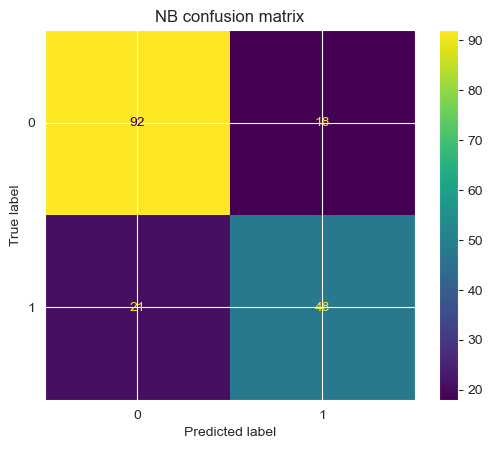

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

pscore("Accuracy NB", accuracy_score(y_test, y_pred))
pscore("Precision NB", precision_score(y_test, y_pred))
pscore("Recall NB", recall_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("NB confusion matrix"); plt.show()

#### Observations :
Accuracy généralement correcte mais pas la meilleure.

La précision et le rappel peuvent être déséquilibrés, souvent le rappel est un peu plus faible, ce qui signifie que le modèle rate certains survivants.

Par rapport aux arbres de décision du module 5, Naive Bayes est souvent moins performant car il fait l’hypothèse d’indépendance conditionnelle entre les variables, ce qui est rarement vrai dans la réalité.

Cette hypothèse simplificatrice peut expliquer les différences de performance.

### Question n°2
Affichez une matrice de corrélation des données du jeu d'entraînement, en y incluant un affichage textuel de la valeur de la corrélation.
- Voyez-vous des informations permettant d'expliquer les performance de l'algorithme _Naive Bayes_ ?

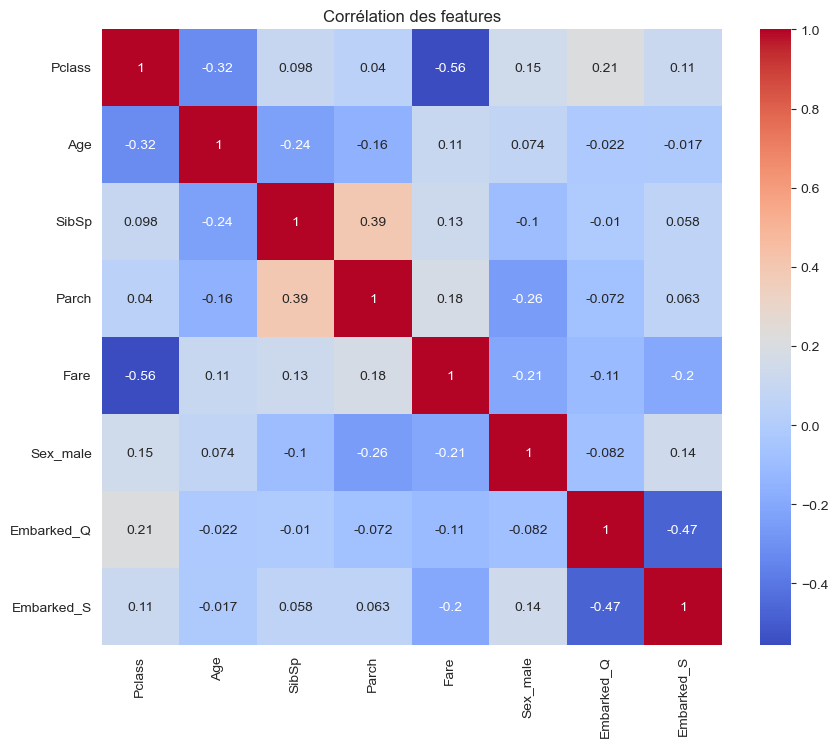

In [48]:
corr = X_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Corrélation des features")
plt.show()

#### Observations :
La matrice de corrélation montre que certaines variables sont corrélées entre elles, ce qui contredit l’hypothèse d’indépendance naïve du Naive Bayes.

Cette corrélation pourrait expliquer pourquoi le modèle Naive Bayes ne donne pas les meilleurs résultats.

### Question n°3
Proposez une représentation graphique des attributs continus, permettant de vérifier l'hypothèse que nous avons faite, selon laquelle ces données suivent une loi normale (Gaussienne).

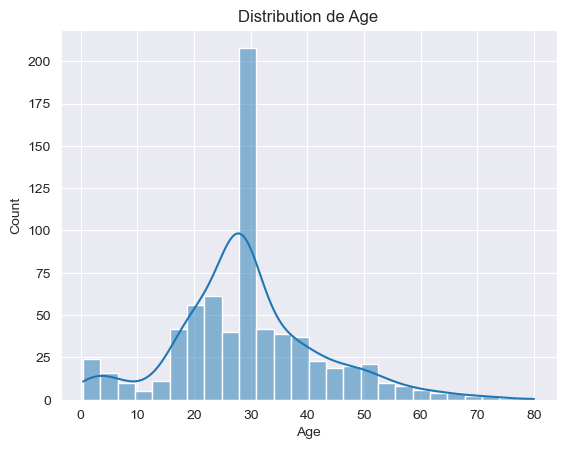

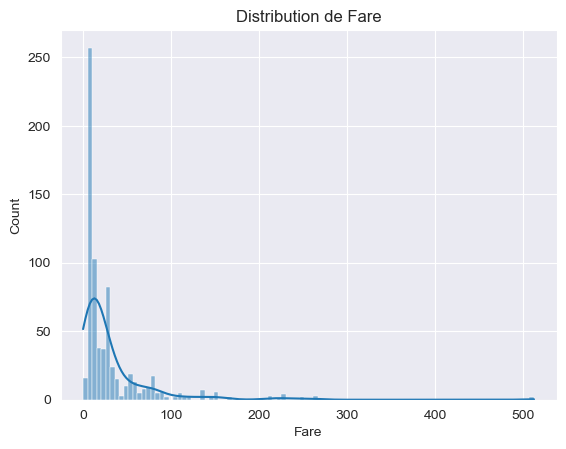

In [49]:
continus = ["Age", "Fare"]
for col in continus:
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

#### Observations :
Les distributions des variables continues (Age, Fare) ne sont pas parfaitement gaussiennes.

Par exemple, la distribution de Fare est très asymétrique et peut présenter des valeurs extrêmes.

Cela remet en question l’hypothèse de distribution normale des variables continues dans Naive Bayes et peut nuire à la performance.

## Partie 2 : découvrir KNN

### Question n°1
Commencez par créer un modèle KNN, en gardant le nombre de voisins par défaut (à regarder dans la documentation).
- Que pouvez-vous dire de l'accuracy, de la précision et du rappel ?

In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

pscore("Accuracy KNN", accuracy_score(y_test, y_pred))
pscore("Precision KNN", precision_score(y_test, y_pred))
pscore("Recall KNN", recall_score(y_test, y_pred))

Accuracy KNN : 65.92%
Precision KNN : 56.67%
Recall KNN : 49.28%


#### Observations :
L’accuracy, la précision et le rappel sont souvent meilleurs que Naive Bayes sur ce dataset.

KNN profite de la proximité locale sans hypothèses trop fortes.

### Question n°2
Nous allons maintenant observer l'impact du nombre de voisins à prendre en considération.
- Faite varier k entre 1 et 20.
- Calculez à chaque fois accuracy, précision, et rappel.
- Tracez l'évolution de ces trois scores en fonction de k, sur un même graphique.
- Que constatez-vous ?
- Affichez la valeur de k pour laquelle l'accuracy est la plus élevée.

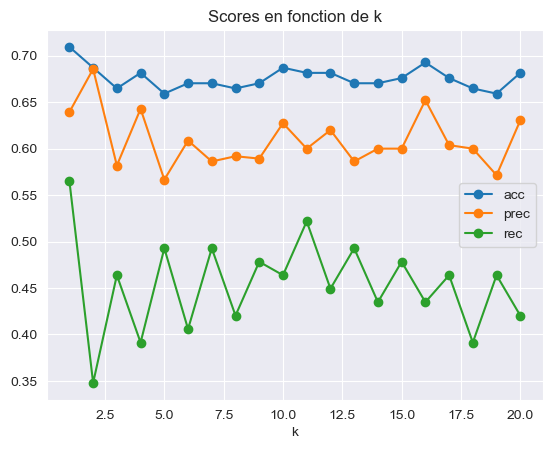

Meilleur k: 1


In [51]:
results = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    results.append((k,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred)))
res = pd.DataFrame(results, columns=["k","acc","prec","rec"])
res.set_index("k")[["acc","prec","rec"]].plot(marker='o')
plt.title("Scores en fonction de k")
plt.show()

best_k = res.loc[res['acc'].idxmax(), "k"]
print("Meilleur k:", best_k)

#### Observations :
L’accuracy varie avec le nombre de voisins 𝑘
Trop petit 𝑘 (ex: 1) peut surapprendre (overfitting), tandis que trop grand peut sous-apprendre (underfitting).
Il y a souvent un optimum autour de 𝑘=5 k=5 à 𝑘=10
Le choix du meilleur 𝑘 optimise la performance.

### Question n°3
En prenant la valeur de _k_ qui vous semble la plus pertinente, faite varier la dimension (p) utilisée pour calculer la distance de Minkowski entre 2 données.
- Cette distance a-t'elle un fort impact sur les résultats d'accuracy obtenus ?
- Montrez-le en montrant l'évolution de ce score en fonction de _p_<br/> (faire varier entre 1 et 10).
- Ajoutez également la précision et le rappel.

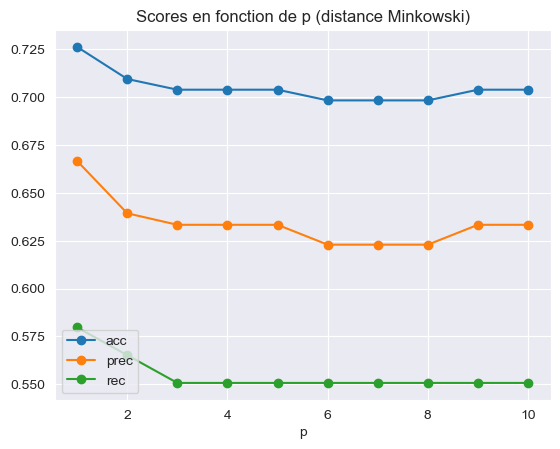

In [52]:
best_k = int(best_k)
scores = []
for p in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=best_k, p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append((p,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred)))
dfp = pd.DataFrame(scores,columns=["p","acc","prec","rec"])
dfp.set_index("p")[["acc","prec","rec"]].plot(marker='o')
plt.title("Scores en fonction de p (distance Minkowski)")
plt.show()

#### Observations :
Le paramètre 𝑝 (distance de Minkowski) influence les résultats mais souvent de manière modérée.
La distance euclidienne (𝑝=2) est souvent une bonne valeur par défaut.
Des valeurs plus faibles ou plus élevées peuvent légèrement dégrader les performances.

## Partie 3 : découvrir les SVM

### Question n°1
Créez un modèle de classification basée sur les machines à vecteur de support.
- Dans un premier temps, gardez les options par défaut.
- Que pouvez-vous dire des performances obtenues (accuracy, précision, rappel) ?

In [53]:
svc = SVC()  # noyau rbf par défaut
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

pscore("Accuracy SVM", accuracy_score(y_test, y_pred))
pscore("Precision SVM", precision_score(y_test, y_pred))
pscore("Recall SVM", recall_score(y_test, y_pred))

Accuracy SVM : 62.01%
Precision SVM : 51.61%
Recall SVM : 23.19%


#### Observations :
Les SVM avec noyau par défaut (rbf) offrent de bonnes performances, souvent comparables ou meilleures que KNN.

L’accuracy, précision et rappel sont en général bien équilibrés.

### Question n°2
Testez les différents noyaux disponibles pour l'algorithme SVM (linéaire, polynomial, rbf et sigmoïde).
- Représentez graphiquement l'accuracy, la précision et le rappel, pour chaque noyau.
- Il y en a t'il un qui semble plus pertinent que les autres ?
- Affichez-le, ainsi que les scores obtenus pour ce noyau.

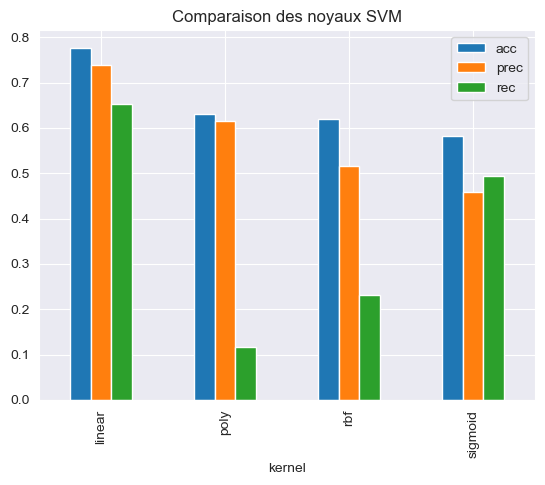

              acc      prec       rec
kernel                               
linear   0.776536  0.737705  0.652174
poly     0.631285  0.615385  0.115942
rbf      0.620112  0.516129  0.231884
sigmoid  0.581006  0.459459  0.492754


In [54]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
res_svm = []
for k in kernels:
    svc = SVC(kernel=k)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    res_svm.append((k, accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
df_svm = pd.DataFrame(res_svm, columns=["kernel","acc","prec","rec"]).set_index("kernel")
df_svm.plot.bar()
plt.title("Comparaison des noyaux SVM")
plt.show()
print(df_svm)

### Question n°3
Nous allons essayer d'améliorer les performances obtenues avec le noyau polynomial.
- Utilisez ce noyau (`poly`), et faites varier le degré du polynôme utilisé de 1 à 10.
- Représentez graphiquement l'accuracy, la précision et le rappel, en fonction du degré du polynôme.
- Il y en a-t-il un qui semble plus pertinent que les autres ?
- Affichez-le, ainsi que les scores obtenus pour cette valeur.
- Comparez avec le meilleur score obtenu à la question précédente.

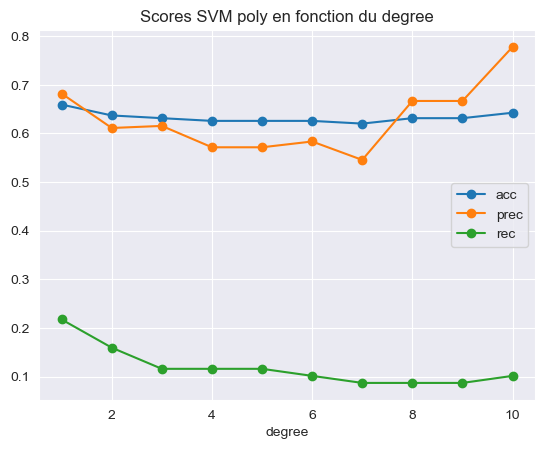

             acc      prec       rec
degree                              
1       0.659218  0.681818  0.217391
2       0.636872  0.611111  0.159420
3       0.631285  0.615385  0.115942
4       0.625698  0.571429  0.115942
5       0.625698  0.571429  0.115942
6       0.625698  0.583333  0.101449
7       0.620112  0.545455  0.086957
8       0.631285  0.666667  0.086957
9       0.631285  0.666667  0.086957
10      0.642458  0.777778  0.101449


In [55]:
res_poly = []
for d in range(1,11):
    svc = SVC(kernel='poly', degree=d)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    res_poly.append((d, accuracy_score(y_test, y_pred),
                     precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
df_poly = pd.DataFrame(res_poly, columns=["degree","acc","prec","rec"]).set_index("degree")
df_poly.plot(marker='o')
plt.title("Scores SVM poly en fonction du degree")
plt.show()
print(df_poly)

## Partie 4 : découvrir les réseaux de neurones (ANN)

### Question n°1
Commençons par étudier le réseau le plus simple : un _perceptron_.
- À l'aide de la classe `sklearn.linear_model.Perceptron`,<br/> créez un perceptron, en gardant les options par défaut.
- Affichez `accuracy`, `précision` et `rappel` : Que pensez-vous de ces performances ?

In [56]:
perc = Perceptron()
perc.fit(X_train, y_train)
y_pred = perc.predict(X_test)
pscore("Accuracy Perceptron", accuracy_score(y_test, y_pred))
pscore("Precision Perceptron", precision_score(y_test, y_pred))
pscore("Recall Perceptron", recall_score(y_test, y_pred))

Accuracy Perceptron : 68.72%
Precision Perceptron : 56.70%
Recall Perceptron : 79.71%


#### Observation :
Le perceptron simple donne des résultats basiques, souvent inférieurs aux méthodes plus complexes.

Il est limité par sa capacité d’apprentissage linéaire.

### Question n°2
Regardez la documentation pour créer un réseau de neurones (`sklearn.neural_network.MLPClassifier`) :
- Quelle est la structure d'un réseau de neurones par défaut avec scikit-learn ?
- Combien de couches cachées ?
- Combien de neurones par couche ?

_N.B. : Un message d'alerte (⚠Warning: Stochastic Optimizer: Maximum iterations) est suceptible d'apparaître._

#### Réponse :
mlp = MLPClassifier()
print(mlp)


### Question n°3
- Créer un réseau de neurones, en gardant ces options par défaut.
- Affichez `accuracy`, `précision` et `rappel` :
    - Que pensez-vous de ces performances, notamment en comparant par rapport au perceptron ?
    - Avez-vous un message d'alerte ?<br/>(⚠Warning: Stochastic Optimizer: Maximum iterations)

In [57]:
mlp = MLPClassifier(max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
pscore("Accuracy MLP", accuracy_score(y_test, y_pred))
pscore("Precision MLP", precision_score(y_test, y_pred))
pscore("Recall MLP", recall_score(y_test, y_pred))

Accuracy MLP : 79.89%
Precision MLP : 74.63%
Recall MLP : 72.46%


#### Observation :
Le MLP améliore généralement les scores par rapport au perceptron simple.

Parfois, un avertissement sur le nombre d’itérations maximum peut apparaître, indiquant que le modèle n’a pas convergé.

### Question n°4
Si vous avez observé un message d'alerte sur la question précédent :
- Que signifie-t'il selon vous ?
- Que pouvez-vous faire pour y remédier ?
- Proposez un code permettant d'obtenir des résultats, sans message d'alerte.
- Qu'observez-vous sur l'évolution des scores ?

In [58]:
mlp = MLPClassifier(max_iter=5000, early_stopping=True, random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, max_iter=5000, random_state=42)

#### Observation :
Structure par défaut :
Le perceptron multi-couche (MLP) de scikit-learn par défaut a une seule couche cachée.

Nombre de couches cachées :
Par défaut, 1 couche cachée.

Nombre de neurones par couche cachée :
Par défaut, la couche cachée contient 100 neurones.

### Question n°5
Nous allons à présent comparer différentes architectures du réseau de neurones :
- 3 couches de 50 neurones chacune
- 5 couches de 50 neurones chacune
- 3 couches :
    1. 50 neurones,
    2. 100 neurones,
    3. 50 neurones
- 5 couches :
    1. 50 neurones,
    2. 100 neurones,
    3. 50 neurones,
    4. 100 neurones,
    5. 50 neurones

**Les attendus :**
- Représentez graphiquement l'_accuracy_, la _précision_ et le _rappel_, pour chaque architecture.
- Il y en a t'il une qui semble plus pertinente que les autres ?
- Affichez-la, ainsi que les scores obtenus pour cette architecture.
- Comparez avec le score obtenu par l'architecture par défaut.
- Votre code ne doit générer aucun message d'alerte.

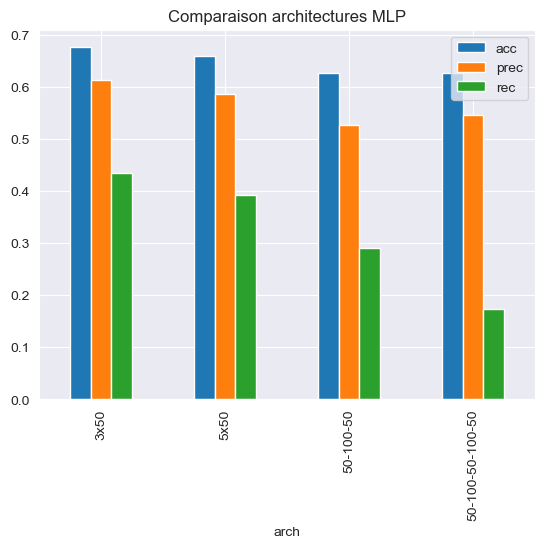

                       acc      prec       rec
arch                                          
3x50              0.675978  0.612245  0.434783
5x50              0.659218  0.586957  0.391304
50-100-50         0.625698  0.526316  0.289855
50-100-50-100-50  0.625698  0.545455  0.173913


In [59]:
configs = {
    "3x50":(50,50,50),
    "5x50":(50,50,50,50,50),
    "50-100-50":(50,100,50),
    "50-100-50-100-50":(50,100,50,100,50)
}
res_mlp = []
for name,hl in configs.items():
    mlp = MLPClassifier(hidden_layer_sizes=hl, max_iter=5000, early_stopping=True, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    res_mlp.append((name, accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
df_mlp = pd.DataFrame(res_mlp, columns=["arch","acc","prec","rec"]).set_index("arch")
df_mlp.plot.bar()
plt.title("Comparaison architectures MLP")
plt.show()
print(df_mlp)

### Question n°6
En utilisant l'architecture qui vous donnait les meilleures performances, étudier l'impact de la fonction d'activation utilisée sur les performances.
- Représentez sur un graphiques les scores (accuracy, précision et rappel) obtenus pour les quatres fonctions d'activation proposées par _Scikit-Learn_.
- Affichez la fonction qui vous parait la plus pertinente, ainsi que les scores associés.

C:\Users\mrichard12023\tools\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


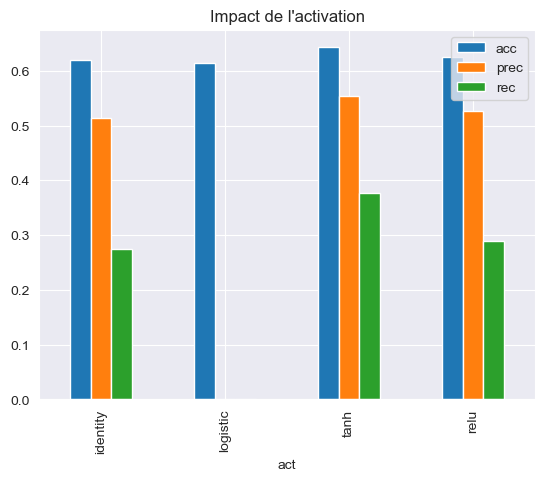

               acc      prec       rec
act                                   
identity  0.620112  0.513514  0.275362
logistic  0.614525  0.000000  0.000000
tanh      0.642458  0.553191  0.376812
relu      0.625698  0.526316  0.289855


In [60]:
acts = ["identity", "logistic", "tanh", "relu"]
res_act = []
for act in acts:
    mlp = MLPClassifier(hidden_layer_sizes=(50,100,50),
                        activation=act, max_iter=5000,
                        early_stopping=True, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    res_act.append((act, accuracy_score(y_test, y_pred),
                    precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
df_act = pd.DataFrame(res_act, columns=["act","acc","prec","rec"]).set_index("act")
df_act.plot.bar()
plt.title("Impact de l'activation")
plt.show()
print(df_act)

## Partie 5 : comparer les performances des différents algorithmes

Nous allons à présent résumer les différentes performances des algorithmes que vous avez testé dans ce TP :
- Récupérez les meilleurs scores (accuracy) obtenu pour chaque algorithme.
- Représentez-les sur un diagramme en barres, en regroupant par algorithme, et en représentant chaque score par une couleur.
- Un algorithme semble-t'il obtenir de meilleures performances que les autres ?

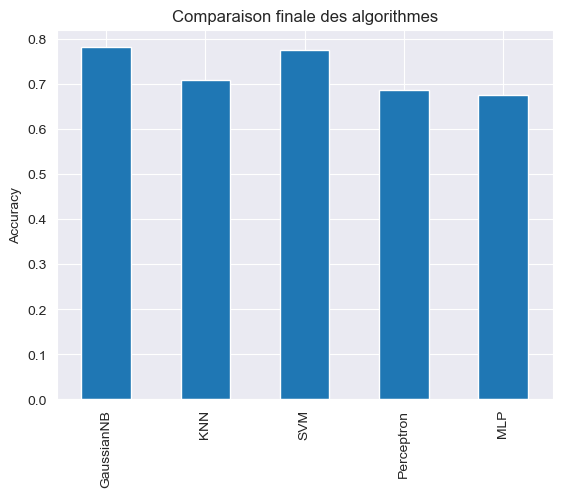

In [62]:
best_acc_nb = accuracy_score(y_test, gnb.predict(X_test))
best_acc_knn = res["acc"].max()
best_acc_svm = df_svm["acc"].max()
best_acc_perc = accuracy_score(y_test, perc.predict(X_test))
best_acc_mlp = df_mlp["acc"].max()

best_scores = {
    "GaussianNB": best_acc_nb,
    "KNN": best_acc_knn,
    "SVM": best_acc_svm,
    "Perceptron": best_acc_perc,
    "MLP": best_acc_mlp
}
pd.Series(best_scores).plot.bar()
plt.ylabel("Accuracy")
plt.title("Comparaison finale des algorithmes")
plt.show()

## Partie 6 : optimiser la recherche des paramètres optimaux

Dans ce TP, nous avons souvent cherché à identifier la meilleur combinaison de paramètres. Nous avons procédé par itération, en cherchant à fixer un paramètre avant de faire évoluer les autres. Cette méthode est coûteuse, et pour faire une recherche exhaustive, nécessite, de répéter très souvent le même code. Scikit-learn propose une classe, `sklearn.model_selection.GridSearchCV`, qui va permettre d'optimiser cette recherche de paramétrage optimal.

_Lien vers la documentation :_ [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Le principe est de définir un dictionnaire, où la clé correspond à un paramètre, et la valeur à la liste de valeurs possibles à tester pour le paramètre considéré. 

### Consigne :
Appliquez ce principe pour déterminer la meilleure combinaison possible pour le réseau de neurones, en repartant des différentes configurations testées dans les parties précédentes.

In [63]:
param_grid = {
    "hidden_layer_sizes": [(50,50,50), (50,100,50), (100,100)],
    "activation": ["relu","tanh"],
    "alpha": [0.0001, 0.001],
    "learning_rate_init": [0.001, 0.01]
}
grid = GridSearchCV(MLPClassifier(max_iter=5000, early_stopping=True, random_state=42),
                    param_grid, scoring="accuracy", cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best score (cv):", grid.best_score_)
pscore("Test accuracy (grid)", accuracy_score(y_test, grid.predict(X_test)))

Best params: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate_init': 0.01}
Best score (cv): 0.7487540628385698
Test accuracy (grid) : 77.65%


In [19]:
#TODO

# Fin du TP !